Nous allons effectuer quelques checks basiques pour nous familiariser avec les tables. On commence par importer `sql_request` pour faire ces requêtes en une seule ligne :

In [2]:
import fonctions_perso
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

slt gro


## Table `events`

Commençons par afficher les 5 premières lignes de la table afin de voir à quoi elle ressemble :

In [5]:
table = fonctions_perso.sql_request("SELECT * FROM events LIMIT 5;")
table

period_id  MIN  SEC Name (Event Types)  Outcome  X Coordinates  \
0          2   74   34               Pass        1           56.5   
1          2   74   34               Pass        1           56.5   
2          2   74   34               Pass        1           56.5   
3          2   74   34               Pass        1           56.5   
4          2   74   34               Pass        1           56.5   

   Y Coordinates  Qualifier Type  \
0            9.1             140   
1            9.1              56   
2            9.1             141   
3            9.1             213   
4            9.1             212   

                                         Description Qualifier Value  \
0  The x pitch coordinate for the end point of a ...            68.1   
1                          Back, Left, Center, Right          Center   
2  The y pitch coordinate for the end point of a ...            29.4   
3  The angle the ball travels at during an event ...             0.8   
4  The estimated length the ball has travelled du...            18.4   

    date_id   match_id      name_id  team_id  event_id  
0  Date_001  Match_001  Player_0090  Team_01         1  
1  Date_001  Match_001  Player_0090  Team_01         1  
2  Date_001  Match_001  Player_0090  Team_01         1  
3  Date_001  Match_001  Player_0090  Team_01         1  
4  Date_001  Match_001  Player_0090  Team_01         1

In [10]:
table = fonctions_perso.sql_request("SELECT * FROM events LIMIT 5000;")
(table
 .rename(columns = {"Name (Event Types)" : "type"})
 .query("type in ['Goal']")
)

period_id  MIN  SEC  type  Outcome  X Coordinates  Y Coordinates  \
2978          1   34   26  Goal        1           97.2           53.4   
2979          1   34   26  Goal        1           97.2           53.4   
2980          1   34   26  Goal        1           97.2           53.4   
2981          1   34   26  Goal        1           97.2           53.4   
2982          1   34   26  Goal        1           97.2           53.4   
2983          1   34   26  Goal        1           97.2           53.4   

      Qualifier Type                                        Description  \
2978             230             GK position when goal or shot hit post   
2979              56                          Back, Left, Center, Right   
2980             103  Z Co-ordinate for height at which a shot cross...   
2981             231             GK position when goal or shot hit post   
2982              55  This will appear for goals or shots, the relat...   
2983             102  Y Co-ordinate of where a shot crossed goal lin...   

     Qualifier Value   date_id   match_id      name_id  team_id  event_id  
2978             1.4  Date_001  Match_001  Player_0088  Team_02       826  
2979          Center  Date_001  Match_001  Player_0088  Team_02       826  
2980             1.3  Date_001  Match_001  Player_0088  Team_02       826  
2981            54.0  Date_001  Match_001  Player_0088  Team_02       826  
2982             479  Date_001  Match_001  Player_0088  Team_02       826  
2983            52.0  Date_001  Match_001  Player_0088  Team_02       826

Une première chose que l'on peut remarquer : la colonne `Description`. On dirait que cette dernière contient une description de l'évènement :

In [3]:
table["Description"][0]

'The x pitch coordinate for the end point of a pass - See Appendix 11'

Cette variable à plutôt l'air de décrire un champ. C'est bizarre.
Cependant, on remarque tout à la fin la variable `eventId`, qui ici vaut 1 pour les 5 observations.

La table `events` ne contient donc pas une ligne par évènement, mais plutôt une ligne par *information complémentaire de l'évènement*.

Exemple pour l'évènement d'identifiant `1` :
- infos données par les variables :
    - c'est une passe (la variable `Name (Event Types)` vaut `Pass`)
    - a eu lieu à 31'21'' du match `Match_005`
    - elle est réussie (`Outcome` = `1`)
    - a eu lieu aux coordonnées (`62.7`, `49.3`) (*elle a eu lieu* = elle est partie de ce point-là)
    - etc.
- infos données par les champs `Description` & `Qualifier Value` :
    - arrivée au point (`66.7`, `86.8`) (lignes `0` et `4`)
    - passe à ras de terre (ligne `2` : `Pass which was chipped into the air` = `None`)
    - etc...

Regardons par exemple le nombre d'évènements :

In [4]:
events = fonctions_perso.sql_request("SELECT * FROM events;")
len(events["event_id"].unique())

7745

Nombre d'évènements par match :

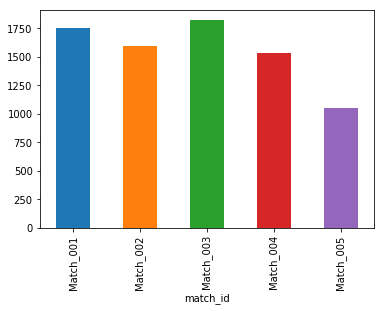

In [5]:
(events
 .groupby("event_id")
 .nth(0)
 .groupby("match_id")
 .size()
 .plot.bar())

Évènements par type :

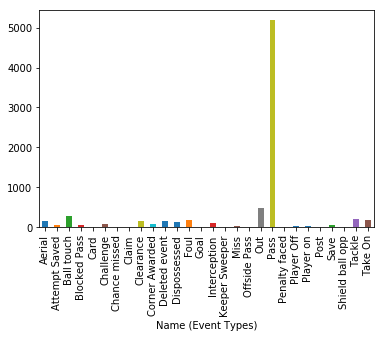

In [6]:
(events
 .groupby("event_id")
 .nth(0)
 .groupby("Name (Event Types)")
 .size()
 .plot.bar())

Sans surprise, la quasi-totalité des évènements sont des passes. Essayons de faire la même chose en enlevant les passes :

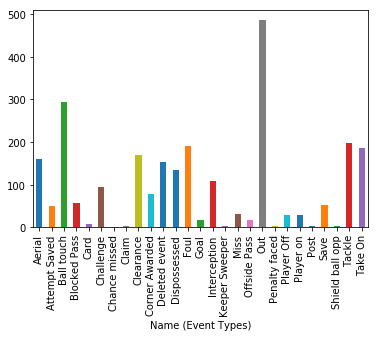

In [7]:
(events
 .groupby("event_id")
 .nth(0)
 .groupby("Name (Event Types)")
 .size()
 .drop("Pass")
 .plot.bar())

Il serait intéressant de savoir à quoi chaque évènement correspond, notamment :
- `Ball touch`
- `Challenge`
- `Claim`
- `Deleted event`
- `Error`
- `Keeper sweeper`
- `Player off`
- `Player on`
- Différence entre `Attempt Saved` et `Save` ?
- `Smother`
- Différence entre `Chance missed` et `Miss` ?

Les noms des colonnes sont à rallonge. Renommons-les de manière plus pratique :

In [8]:
events = events.rename(columns = {"MIN":"min",
                         "SEC":"sec",
                         "Name (Event Types)":"type",
                         "Outcome":"outcome",
                         "X Coordinates":"x",
                         "Y Coordinates":"y",
                         "Qualifier Type":"qualifier_type",
                         "Description":"description",
                         "Qualifier Value":"qualifier_value"})
events.head()

period_id  min  sec  type  outcome     x    y  qualifier_type  \
0          2   74   34  Pass        1  56.5  9.1             140   
1          2   74   34  Pass        1  56.5  9.1              56   
2          2   74   34  Pass        1  56.5  9.1             141   
3          2   74   34  Pass        1  56.5  9.1             213   
4          2   74   34  Pass        1  56.5  9.1             212   

                                         description qualifier_value  \
0  The x pitch coordinate for the end point of a ...            68.1   
1                          Back, Left, Center, Right          Center   
2  The y pitch coordinate for the end point of a ...            29.4   
3  The angle the ball travels at during an event ...             0.8   
4  The estimated length the ball has travelled du...            18.4   

    date_id   match_id      name_id  team_id  event_id  
0  Date_001  Match_001  Player_0090  Team_01         1  
1  Date_001  Match_001  Player_0090  Team_01         1  
2  Date_001  Match_001  Player_0090  Team_01         1  
3  Date_001  Match_001  Player_0090  Team_01         1  
4  Date_001  Match_001  Player_0090  Team_01         1

Vérifions que chaque évènement d'un même type possède le même nombre de qualifiers :

In [9]:
(events
 .groupby("event_id")
 .agg({"type":"first", "qualifier_type":"count"})
 .head())

type  qualifier_type
event_id                      
1         Pass               5
2         Pass               5
3         Pass               5
4         Pass               5
5         Pass               6

Ce n'est pas du tout le cas. Il s'agit probablement de différentes sortes de passes (passes à ras de terre, passes en profondeur...).

Regardons ça de plus près pour les passes par exemple
Commençons par l'`event_d` 1 :

In [10]:
values = events.query("event_id == 1")["description"]
for v in values:
    print(v)

The x pitch coordinate for the end point of a pass - See Appendix 11
Back, Left, Center, Right
The y pitch coordinate for the end point of a pass - See Appendix 11
The angle the ball travels at during an event relative to the direction of play. Shown in radians.
The estimated length the ball has travelled during the associated event.


Cette passe est décrite par 6 champs :
- x d'arrivée
- y d'arrivée
- longueur de la passe estimée (demander ce que *estimée* signifie)
- passe à ras de terre ou non
- angle (en radians) de la passe par rapport à la direction du jeu (demander ce que ça signifie précisément)
- `Back, Left, Center, Right`, aucune idée de la signification

Au tour de l'`event_id` 2 :

In [11]:
values = events.query("event_id == 2")["description"]
for v in values:
    print(v)

The estimated length the ball has travelled during the associated event.
The x pitch coordinate for the end point of a pass - See Appendix 11
Back, Left, Center, Right
The angle the ball travels at during an event relative to the direction of play. Shown in radians.
The y pitch coordinate for the end point of a pass - See Appendix 11


Tout pareil, seulement il manque l'info *passe à ras de terre ou non*. Demander pourquoi.

Passons maintenant à l'`event_id` 5 qui contient 20 champs (!) :

In [12]:
values = events.query("event_id == 5")["description"]
for v in values:
    print(v)

The estimated length the ball has travelled during the associated event.
Used for any event where there is the same event for both teams with outcome 1 or 0. This relates the 2 event together, for example aerial duels
The angle the ball travels at during an event relative to the direction of play. Shown in radians.
The y pitch coordinate for the end point of a pass - See Appendix 11
The x pitch coordinate for the end point of a pass - See Appendix 11
Back, Left, Center, Right


Ces 20 champs ont l'air d'être dus à de la redondance. En effet, on retrouve les mêmes 5 champs que pour l'`event_id` 2, mais chacun répété 4 fois. Regardons si le svaleurs de ecs champs sont égales :

In [13]:
(events[["event_id", "description", "qualifier_value"]]
 .query("event_id == 5")
 .sort_values("description"))

event_id                                        description  \
2786         5                          Back, Left, Center, Right   
2783         5  The angle the ball travels at during an event ...   
2781         5  The estimated length the ball has travelled du...   
2785         5  The x pitch coordinate for the end point of a ...   
2784         5  The y pitch coordinate for the end point of a ...   
2782         5  Used for any event where there is the same eve...   

     qualifier_value  
2786            Back  
2783             1.8  
2781             2.6  
2785            29.9  
2784            74.4  
2782             654

À part pour le champ `Back, Left, Center, Right` qui vaut `Right`, chaque autre champ a 2 valeurs différentes renseignées. C'est vraiment bizarre

Pour un même type d'évènement (passe, tir, etc...), certains évènements ne possèdent pas le même nombre de qualifiers. Regardons pour chaque type d'évènements, les différents nombre de qualifiers possibles :

In [14]:
(events
 .groupby("event_id")
 .agg({"type":"first", "qualifier_type":"count"})
 .groupby("type")["qualifier_type"]
 .value_counts()
 .to_csv("qualifier_counts_per_event_type.csv")
)

Regardons ce que ça donne si l'on essaye un `pivot` sur les évènements `Aerial` par exemple :

In [15]:
(events
 .query("type == 'Aerial'")
 .pivot(columns="qualifier_type", values="event_id")
)

qualifier_type     56      233
223             6721.0     NaN
224                NaN  6721.0
263              199.0     NaN
264                NaN   199.0
275             2555.0     NaN
276                NaN  2555.0
287             2586.0     NaN
288                NaN  2586.0
300             2654.0     NaN
301                NaN  2654.0
317             6466.0     NaN
318                NaN  6466.0
326             6625.0     NaN
327                NaN  6625.0
356               43.0     NaN
357                NaN    43.0
373                NaN   135.0
374              135.0     NaN
380              226.0     NaN
381                NaN   226.0
416                NaN   426.0
417              426.0     NaN
472             1340.0     NaN
473                NaN  1340.0
481             1405.0     NaN
482                NaN  1405.0
511                NaN  2631.0
512             2631.0     NaN
765              250.0     NaN
766                NaN   250.0
...                ...     ...
29046              NaN  2839.0
29047           2839.0     NaN
29271              NaN  6138.0
29272           6138.0     NaN
29329              NaN  3013.0
29330           3013.0     NaN
29490           3705.0     NaN
29491              NaN  3705.0
29501              NaN  4806.0
29502           4806.0     NaN
29541              NaN  5159.0
29542           5159.0     NaN
29548           5308.0     NaN
29549              NaN  5308.0
29627           4077.0     NaN
29628              NaN  4077.0
30388           3727.0     NaN
30389              NaN  3727.0
30409           4944.0     NaN
30410              NaN  4944.0
30467           6299.0     NaN
30468              NaN  6299.0
31211              NaN  4685.0
31212           4685.0     NaN
31213           4701.0     NaN
31214              NaN  4701.0
31554           5148.0     NaN
31555              NaN  5148.0
31955              NaN  6096.0
31956           6096.0     NaN

[320 rows x 2 columns]

Jetons un oeil aux qualifiers associés aux tirs, notamment ceux pertinents pour un modèle d'expected goals :

In [16]:
(events
 .query("type in ['Miss','Post','Attempt Saved','Goal']")
 .pivot(columns="qualifier_type", values="event_id")
 .notna()
 .sum(0)
 .sort_values(ascending=False)
)

qualifier_type
56     103
103     80
102     80
55      78
147     54
146     54
233     52
231     46
230     46
282      3
281      3
280      3
216      3
dtype: int64

On remarque d'abord la grande quantité de valeurs manquantes. En effet, le qualifier 56 renseigne sur la zone du terrain où l'action a eu lieu (left, right, center, back). Peu informatif... Surtout que cette information déjà résente dans les variables de coordonnées
Les 2èmes et 3èmes qualifiers renseignent sur l'emplacement du ballon lorsqu'il a franchi la ligne de but. C'est utile pour un modèle de post shot xG mais c'est hors du cadre de ce projet a priori.
Bref je pense que pour le modèle d'xG les variables cruciales viendront de la jointure entre la table des évènements et celles des données de tracking. En effet, c'est grâce à cette dernière que nous pourrons créer les variables de distance par rapport au goal, distance par rapport au but, emplacement sur le terrain, position des défenseurs, etc...

C'est pour ça que selon moi, on doit pour l'instant se focaliser sur :
1. check d'intégrité des variables de timestamp & de coordonnées
2. consolider ces données en cas d'incohérence
3. effectuer le même travail sur la table tracking
4. faire les jointures & filtrages & pivotages de tables nécessaires pour arriver à une table des tirs du type :

| timestamp | x | y | x.GK | y.GK | x.player1 | y.player2 | ...
| --------- | - | - | ---- | ---- | --------- | --------- | ---
| --------- | - | - | ---- | ---- | --------- | --------- | ---
| --------- | - | - | ---- | ---- | --------- | --------- | ---


Pour le modèle d'expected goals, nous aurons besoin d'identifier les goals parmi les autres joueurs :

In [17]:
gks = (events.
 query("type in ['Smother','Claim','Keeper Sweeper', 'Penalty faced']")
 .groupby("event_id")
 .agg({"type": lambda x: x.iloc[0], "name_id": lambda x: x.iloc[0]}))
gks.to_csv("likely_goalkeepers.csv")
gks

type      name_id
event_id                             
789                Claim  Player_0040
1485      Keeper Sweeper  Player_0034
2513       Penalty faced  Player_0013
3178               Claim  Player_0042
3750       Penalty faced  Player_0042
5717               Claim  Player_0042
6037       Penalty faced  Player_0042
7323       Penalty faced  Player_0080
7873      Keeper Sweeper  Player_0042

Plaçons maintenant dans le cadre de la construction du modèle d'expected goals. Nous voulons une table avec une ligne par tir qui ressemble à ça :

| timestamp | goal  | feature_1   | feature_2   | feature_3 | feature_4 | feature_5 | feature_6 | ... |
|-----------|-------|-----|-----|------|------|-----------|-----------|-----|
| ...       | True  | ... | ... | ...  | ...  | ...       | ...       | ... |
| ...       | False | ... | ... | ...  | ...  | ...       | ...       | ... |
| ...       | False | ... | ... | ...  | ...  | ...       | ...       | ... |

In [18]:
(events
 .query("type in ['Miss', 'Post', 'Attempt Saved', 'Goal']")
 .drop(["outcome", "qualifier_type", "description", "qualifier_value", "date_id"], axis=1)
 .groupby(by="event_id")
 .agg({"min": lambda x: x.mode(),
       "sec": lambda x: x.mode(),
       "type": lambda x: x.mode(),
       "x": "median",
       "y": "median",
       "match_id": lambda x: x.mode(),
       "name_id": lambda x: x.mode(),
       "team_id": lambda x: x.mode(),
       "event_id": lambda x: x.mode()})
 .assign(goal=lambda df: df["type"].replace(["Attempt Saved", "Miss", "Post", "Goal"], [False, False, False, True]))
 .drop(["type"], axis=1)
).head()

min  sec     x     y   match_id      name_id  team_id  event_id  \
event_id                                                                    
158        65   34  71.7  57.2  Match_001  Player_0060  Team_02       158   
252        44   15  86.4  69.4  Match_001  Player_0092  Team_01       252   
254        44   18  71.6  69.0  Match_001  Player_0021  Team_01       254   
299        83   48  93.0  33.0  Match_001  Player_0085  Team_02       299   
665        51   35  81.3  73.9  Match_001  Player_0092  Team_01       665   

           goal  
event_id         
158       False  
252       False  
254       False  
299       False  
665       False

In [19]:
track = fonctions_perso.sql_request("SELECT * FROM tracking WHERE match_id IN ('Match_001', 'Match_002');")
events = fonctions_perso.sql_request("SELECT * FROM events WHERE match_id IN ('Match_001', 'Match_002');")

In [20]:
events = fonctions_perso.prepa_events(events)
events.head()

ht     x     y   match_id      name_id  team_id  event_id   goal  time_sec  \
0  2  71.7  57.2  Match_001  Player_0060  Team_02       158  False    1234.0   
1  1  86.4  69.4  Match_001  Player_0092  Team_01       252  False    2655.0   
2  1  71.6  69.0  Match_001  Player_0021  Team_01       254  False    2658.0   
3  2  93.0  33.0  Match_001  Player_0085  Team_02       299  False    2328.0   
4  2  81.3  73.9  Match_001  Player_0092  Team_01       665  False     395.0   

     id_merge  
0  001_2_1234  
1  001_1_2655  
2  001_1_2658  
3  001_2_2328  
4   001_2_395

In [21]:
track = fonctions_perso.prepa_track(track)
track.head()

time_sec ht  posx  posy      name_id  team_id   match_id id_merge  gardien
0       0.0  1  41.2  40.7  Player_0088  Team_02  Match_001  001_1_0    False
1       1.0  1  42.0  40.3  Player_0088  Team_02  Match_001  001_1_1    False
2       2.0  1  42.9  39.8  Player_0088  Team_02  Match_001  001_1_2    False
3       3.0  1  43.8  40.4  Player_0088  Team_02  Match_001  001_1_3    False
4       4.0  1  45.0  43.7  Player_0088  Team_02  Match_001  001_1_4    False

In [22]:
test_jointure = pd.merge(track, events, how="right", on="id_merge")

In [23]:
test_jointure.head()

time_sec_x ht_x  posx  posy    name_id_x team_id_x match_id_x   id_merge  \
0       563.0    1  77.3  59.9  Player_0088   Team_02  Match_001  001_1_563   
1       563.0    1  77.9  37.0  Player_0029   Team_02  Match_001  001_1_563   
2       563.0    1  73.1  57.6  Player_0056   Team_02  Match_001  001_1_563   
3       563.0    1  72.3  71.8  Player_0004   Team_02  Match_001  001_1_563   
4       563.0    1  53.1  82.2  Player_0035   Team_02  Match_001  001_1_563   

   gardien ht_y     x     y match_id_y    name_id_y team_id_y  event_id  goal  \
0    False    1  85.5  47.3  Match_001  Player_0060   Team_02      1466  True   
1    False    1  85.5  47.3  Match_001  Player_0060   Team_02      1466  True   
2    False    1  85.5  47.3  Match_001  Player_0060   Team_02      1466  True   
3    False    1  85.5  47.3  Match_001  Player_0060   Team_02      1466  True   
4    False    1  85.5  47.3  Match_001  Player_0060   Team_02      1466  True   

   time_sec_y  
0       563.0  
1       563.0  
2       563.0  
3       563.0  
4       563.0

In [24]:
shots_players = (test_jointure
 .drop(["time_sec_y",
        "ht_y",
        "match_id_y"], axis=1)
 .rename(columns = {"time_sec_x": "time",
                    "ht_x": "half_time",
                    "posx": "player_x",
                    "posy": "player_y",
                    "name_id_x": "player",
                    "team_id_x": "player_team",
                    "match_id_x": "match",
                    "x": "shot_x",
                    "y": "shot_y",
                    "name_id_y": "striker",
                    "team_id_y": "striker_team"
                   })
)

In [25]:
shots_players["opposing_gk"] = (shots_players["player_team"] != shots_players["striker_team"]) & shots_players["gardien"]

In [26]:
shots_players

time half_time  player_x  player_y       player player_team      match  \
0     563.0         1      77.3      59.9  Player_0088     Team_02  Match_001   
1     563.0         1      77.9      37.0  Player_0029     Team_02  Match_001   
2     563.0         1      73.1      57.6  Player_0056     Team_02  Match_001   
3     563.0         1      72.3      71.8  Player_0004     Team_02  Match_001   
4     563.0         1      53.1      82.2  Player_0035     Team_02  Match_001   
5     563.0         1      18.9      54.0  Player_0034     Team_02  Match_001   
6     563.0         1      63.1      52.6  Player_0030     Team_02  Match_001   
7     563.0         1      51.9      63.0  Player_0063     Team_02  Match_001   
8     563.0         1      83.4      55.6  Player_0060     Team_02  Match_001   
9     563.0         1      49.3      49.3  Player_0036     Team_02  Match_001   
10    563.0         1      51.8      32.0  Player_0070     Team_02  Match_001   
11    563.0         1      35.9      15.0  Player_0021     Team_01  Match_001   
12    563.0         1      15.0      47.2  Player_0067     Team_01  Match_001   
13    563.0         1       6.8      51.1  Player_0040     Team_01  Match_001   
14    563.0         1      41.6      74.0  Player_0087     Team_01  Match_001   
15    563.0         1      17.6      53.2  Player_0079     Team_01  Match_001   
16    563.0         1      42.4      17.6  Player_0010     Team_01  Match_001   
17    563.0         1      47.4      50.3  Player_0044     Team_01  Match_001   
18    563.0         1      20.7      40.9  Player_0025     Team_01  Match_001   
19    563.0         1      18.2      60.3  Player_0005     Team_01  Match_001   
20    563.0         1      29.1      35.4  Player_0092     Team_01  Match_001   
21    563.0         1      30.1      81.7  Player_0090     Team_01  Match_001   
22    948.0         1      86.2      59.8  Player_0088     Team_02  Match_001   
23    948.0         1      86.8      14.0  Player_0029     Team_02  Match_001   
24    948.0         1      74.9      30.9  Player_0056     Team_02  Match_001   
25    948.0         1      76.8      49.7  Player_0004     Team_02  Match_001   
26    948.0         1      65.4      50.9  Player_0035     Team_02  Match_001   
27    948.0         1      36.2      52.1  Player_0034     Team_02  Match_001   
28    948.0         1      70.0      58.0  Player_0030     Team_02  Match_001   
29    948.0         1      86.2      42.1  Player_0063     Team_02  Match_001   
..      ...       ...       ...       ...          ...         ...        ...   
938  2501.0         2       5.2      51.4  Player_0013     Team_06  Match_002   
939  2501.0         2      12.9      74.3  Player_0002     Team_06  Match_002   
940  2501.0         2      19.2      69.8  Player_0065     Team_06  Match_002   
941  2501.0         2      27.9      43.6  Player_0015     Team_06  Match_002   
942  2501.0         2       9.3      56.9  Player_0059     Team_06  Match_002   
943  2501.0         2      16.7      53.7  Player_0057     Team_06  Match_002   
944  2501.0         2      12.4      60.7  Player_0081     Team_06  Match_002   
945  2501.0         2       9.0      75.4  Player_0050     Team_06  Match_002   
946  2674.0         2      69.8      31.2  Player_0088     Team_02  Match_002   
947  2674.0         2      81.6      27.8  Player_0029     Team_02  Match_002   
948  2674.0         2      55.2      24.3  Player_0035     Team_02  Match_002   
949  2674.0         2      19.4      49.5  Player_0034     Team_02  Match_002   
950  2674.0         2      44.9      55.4  Player_0063     Team_02  Match_002   
951  2674.0         2      79.0      56.6  Player_0083     Team_02  Match_002   
952  2674.0         2      76.4      40.8  Player_0060     Team_02  Match_002   
953  2674.0         2      42.1      35.0  Player_0036     Team_02  Match_002   
954  2674.0         2      57.3      54.0  Player_0022     Team_02  Match_002   
955  2674.0         2      80.3      3

In [27]:
shots_players = shots_players.drop(["gardien"], axis=1)

Essayons de construire une table prête pour entraîner le modèle, avec la feature `gk_distance` :

In [28]:
(shots_players
 .query("opposing_gk")
)

time half_time  player_x  player_y       player player_team      match  \
13    563.0         1       6.8      51.1  Player_0040     Team_01  Match_001   
35    948.0         1       3.7      55.1  Player_0040     Team_01  Match_001   
49   1102.0         1       2.6      55.0  Player_0034     Team_02  Match_001   
79   1231.0         1       3.5      57.2  Player_0040     Team_01  Match_001   
101  2066.0         1       5.7      48.5  Player_0040     Team_01  Match_001   
115  2655.0         1       3.5      54.2  Player_0034     Team_02  Match_001   
137  2658.0         1       3.5      53.6  Player_0034     Team_02  Match_001   
159   395.0         2       1.8      52.9  Player_0034     Team_02  Match_001   
188   954.0         2       4.9      54.9  Player_0040     Team_01  Match_001   
210  1081.0         2       3.9      54.0  Player_0040     Team_01  Match_001   
232  1234.0         2       2.9      50.6  Player_0040     Team_01  Match_001   
246  1624.0         2       4.9      57.0  Player_0034     Team_02  Match_001   
276  1700.0         2       4.3      52.9  Player_0040     Team_01  Match_001   
298  2140.0         2       2.3      53.5  Player_0040     Team_01  Match_001   
320  2328.0         2       3.4      46.3  Player_0040     Team_01  Match_001   
342  2584.0         2       4.4      48.5  Player_0040     Team_01  Match_001   
357   192.0         1       5.6      48.8  Player_0034     Team_02  Match_002   
379   216.0         1       6.4      49.1  Player_0034     Team_02  Match_002   
410   292.0         1       6.4      46.8  Player_0013     Team_06  Match_002   
423   782.0         1       8.6      54.3  Player_0034     Team_02  Match_002   
445   783.0         1       8.7      53.3  Player_0034     Team_02  Match_002   
467   814.0         1       6.0      52.1  Player_0034     Team_02  Match_002   
489   903.0         1       5.9      50.5  Player_0034     Team_02  Match_002   
520   918.0         1       7.4      53.2  Player_0013     Team_06  Match_002   
533  1166.0         1       8.2      50.0  Player_0034     Team_02  Match_002   
555  1364.0         1       6.0      51.6  Player_0034     Team_02  Match_002   
586  1442.0         1       5.0      42.3  Player_0013     Team_06  Match_002   
599  1859.0         1       6.0      49.9  Player_0034     Team_02  Match_002   
621  1869.0         1       5.3      50.2  Player_0034     Team_02  Match_002   
652  2764.0         1       6.7      50.0  Player_0013     Team_06  Match_002   
665  2853.0         1       7.8      51.5  Player_0034     Team_02  Match_002   
696    38.0         2       6.3      48.5  Player_0013     Team_06  Match_002   
718    92.0         2       5.3      52.3  Player_0013     Team_06  Match_002   
740    93.0         2       5.2      52.6  Player_0013     Team_06  Match_002   
762   433.0         2       4.2      49.4  Player_0013     Team_06  Match_002   
784   556.0         2       6.4      47.0  Player_0013     Team_06  Match_002   
806   772.0         2       6.0      53.2  Player_0013     Team_06  Match_002   
828   865.0         2      10.3      46.0  Player_0013     Team_06  Match_002   
850  1044.0         2       6.6      49.2  Player_0013     Team_06  Match_002   
872  1358.0         2       5.0      49.0  Player_0013     Team_06  Match_002   
894  1981.0         2       5.7      53.0  Player_0013     Team_06  Match_002   
916  2183.0         2       9.0      54.5  Player_0013     Team_06  Match_002   
938  2501.0         2       5.2      51.4  Player_0013     Team_06  Match_002   
960  2674.0         2       7.3      53.1  Player_0013     Team_06  Match_002   

       id_merge  shot_x  shot_y      striker striker_team  event_id   goal  \
13    001_1_563    85.5    47.3  Player_0060      Team_02      1466   True   
35    001_1_948    75.6    71.2  Player_0056      Team_02      1376  False   
49   001_1_1102    85.6    67.2  Player_0044      Team_01      1031  False   
79   001_1_1231    89.2    70.9  Player_0029     

In [29]:
test = (shots_players
        .groupby(by="event_id")
        .apply(lambda df1: (df1
                            .query("opposing_gk")
                            .assign(player_x = lambda df: 100 - df.player_x,
                                    player_y = lambda df: 100 - df.player_y,
                                    distance_to_gk = lambda df2: sqrt((df2.shot_x - df2.player_x)**2 + (df2.shot_y - df2.player_y)**2)
                                   )
                           )
              )
       )

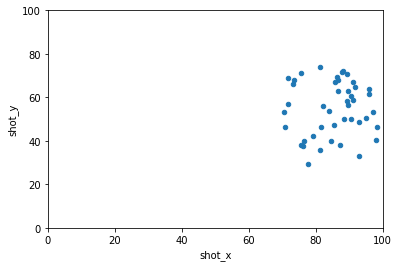

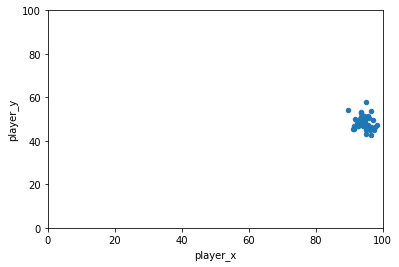

In [30]:
test.plot.scatter("shot_x", "shot_y", xlim=(0,100), ylim=(0,100))
test.plot.scatter("player_x", "player_y", xlim=(0,100), ylim=(0,100))

In [31]:
test

time half_time  player_x  player_y       player player_team  \
event_id                                                                      
158      232  1234.0         2      97.1      49.4  Player_0040     Team_01   
252      115  2655.0         1      96.5      45.8  Player_0034     Team_02   
254      137  2658.0         1      96.5      46.4  Player_0034     Team_02   
299      320  2328.0         2      96.6      53.7  Player_0040     Team_01   
665      159   395.0         2      98.2      47.1  Player_0034     Team_02   
826      101  2066.0         1      94.3      51.5  Player_0040     Team_01   
1031     49   1102.0         1      97.4      45.0  Player_0034     Team_02   
1121     423   782.0         1      91.4      45.7  Player_0034     Team_02   
1122     445   783.0         1      91.3      46.7  Player_0034     Team_02   
1147     467   814.0         1      94.0      47.9  Player_0034     Team_02   
1178     489   903.0         1      94.1      49.5  Player_0034     Team_02   
1200     410   292.0         1      93.6      53.2  Player_0013     Team_06   
1276     79   1231.0         1      96.5      42.8  Player_0040     Team_01   
1376     35    948.0         1      96.3      44.9  Player_0040     Team_01   
1466     13    563.0         1      93.2      48.9  Player_0040     Team_01   
1473     586  1442.0         1      95.0      57.7  Player_0013     Team_06   
1601     555  1364.0         1      94.0      48.4  Player_0034     Team_02   
1621     872  1358.0         2      95.0      51.0  Player_0013     Team_06   
1692     850  1044.0         2      93.4      50.8  Player_0013     Team_06   
1765     916  2183.0         2      91.0      45.5  Player_0013     Team_06   
1809     960  2674.0         2      92.7      46.9  Player_0013     Team_06   
1861     894  1981.0         2      94.3      47.0  Player_0013     Team_06   
1914     533  1166.0         1      91.8      50.0  Player_0034     Team_02   
1971     520   918.0         1      92.6      46.8  Player_0013     Team_06   
2153     938  2501.0         2      94.8      48.6  Player_0013     Team_06   
2247     599  1859.0         1      94.0      50.1  Player_0034     Team_02   
2253     621  1869.0         1      94.7      49.8  Player_0034     Team_02   
2397     357   192.0         1      94.4      51.2  Player_0034     Team_02   
2405     379   216.0         1      93.6      50.9  Player_0034     Team_02   
2514     762   433.0         2      95.8      50.6  Player_0013     Team_06   
2550     784   556.0         2      93.6      53.0  Player_0013     Team_06   
2622     342  2584.0         2      95.6      51.5  Player_0040     Team_01   
4421     806   772.0         2      94.0      46.8  Player_0013     Team_06   
4446     828   865.0         2      89.7      54.0  Player_0013     Team_06   
4458     665  2853.0         1      92.2      48.5  Player_0034     Team_02   
4581     652  2764.0         1      93.3      50.0  Player_0013     Team_06   
6388     696    38.0         2      93.7      51.5  Player_0013     Team_06   
6410     718    92.0         2      94.7      47.7  Player_0013     Team_06   
6412     740    93.0         2      94.8      47.4  Player_0013     Team_06   
6542     298  2140.0         2      97.7      46.5  Player_0040     Team_01   
6583     246  1624.0         2      95.1      43.0  Player_0034     Team_02   
6612     276  1700.0         2      95.7      47.1  Player_0040     Team_01   
6778     188   954.0         2      95.1      45.1  Player_0040     Team_01   
6802     210  1081.0         2      96.1      46.0  Player_0040     Team_01   

                  match    id_merge  shot_x  shot_y      striker striker_team  \
event_id                                                                        
158      232  Match_001  001_2_1234    71.7    57.2  Player_0060      Team_02   
252      115  Match_001  001_1_2655    86.4    69.4  Player_0092      Team_01   
254      137  Match_001  001_1_2658    71.6    69.0  Play

(11, 8)


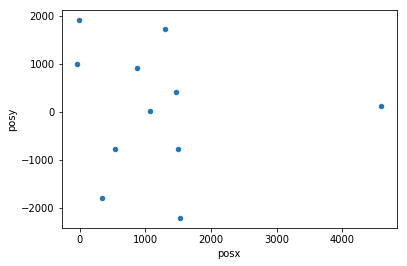

In [11]:
test = fonctions_perso.sql_request('SELECT * FROM tracking WHERE match_id="Match_001" AND time_sec=0 AND ht=1 AND team_id="Team_02";')
print(test.shape)
(test
 .plot
 .scatter("posx", "posy")
)

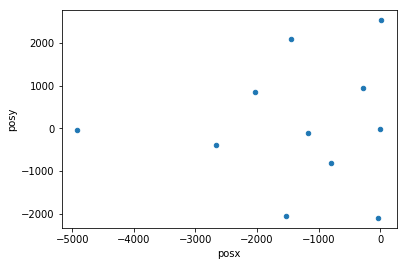

In [13]:
(fonctions_perso.sql_request('SELECT * FROM tracking WHERE match_id="Match_001" AND time_sec=0 AND ht=2 AND team_id="Team_02";')
 .plot
 .scatter("posx", "posy")
)

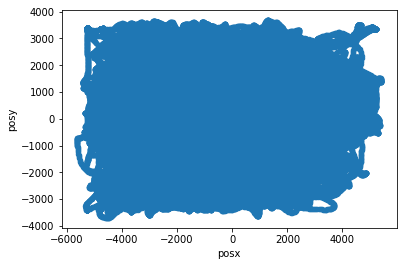

In [14]:
(fonctions_perso.sql_request('SELECT * FROM tracking WHERE match_id="Match_001" AND ht=1;')
 .plot
 .scatter("posx", "posy")
)

In [21]:
track = fonctions_perso.sql_request('SELECT * FROM tracking WHERE (match_id="Match_001" OR match_id="Match_002") AND time_sec=0;')
track

time_sec ht  posx  posy      name_id  team_id   date_id   match_id
0        0.0  1   871   909  Player_0088  Team_02  Date_001  Match_001
1        0.0  2  -797  -824  Player_0088  Team_02  Date_001  Match_001
2        0.0  1    -7  1913  Player_0029  Team_02  Date_001  Match_001
3        0.0  2    18  2529  Player_0029  Team_02  Date_001  Match_001
4        0.0  1   531  -761  Player_0056  Team_02  Date_001  Match_001
5        0.0  2  -279   931  Player_0056  Team_02  Date_001  Match_001
6        0.0  1   333 -1799  Player_0004  Team_02  Date_001  Match_001
7        0.0  2   -34 -2100  Player_0004  Team_02  Date_001  Match_001
8        0.0  1  1533 -2204  Player_0035  Team_02  Date_001  Match_001
9        0.0  2 -1456  2090  Player_0035  Team_02  Date_001  Match_001
10       0.0  1  4597   118  Player_0034  Team_02  Date_001  Match_001
11       0.0  2 -4925   -35  Player_0034  Team_02  Date_001  Match_001
12       0.0  1  1078    19  Player_0030  Team_02  Date_001  Match_001
13       0.0  2 -1178  -109  Player_0030  Team_02  Date_001  Match_001
14       0.0  1  1505  -760  Player_0063  Team_02  Date_001  Match_001
15       0.0  2 -2035   840  Player_0063  Team_02  Date_001  Match_001
16       0.0  1   -42   998  Player_0060  Team_02  Date_001  Match_001
17       0.0  2     0   -29  Player_0060  Team_02  Date_001  Match_001
18       0.0  1  1465   423  Player_0036  Team_02  Date_001  Match_001
19       0.0  2 -2674  -403  Player_0036  Team_02  Date_001  Match_001
20       0.0  1  1306  1732  Player_0070  Team_02  Date_001  Match_001
21       0.0  2 -1523 -2057  Player_0070  Team_02  Date_001  Match_001
22       0.0  1 -1595 -2111  Player_0021  Team_01  Date_001  Match_001
23       0.0  1 -1959  -601  Player_0067  Team_01  Date_001  Match_001
24       0.0  2  1919   435  Player_0067  Team_01  Date_001  Match_001
25       0.0  1 -4346   177  Player_0040  Team_01  Date_001  Match_001
26       0.0  2  4591    40  Player_0040  Team_01  Date_001  Match_001
27       0.0  1    13  3045  Player_0087  Team_01  Date_001  Match_001
28       0.0  2   691  1840  Player_0087  Team_01  Date_001  Match_001
29       0.0  2  1729  1652  Player_0073  Team_01  Date_001  Match_001
..       ... ..   ...   ...          ...      ...       ...        ...
58       0.0  1  -160 -1420  Player_0060  Team_02  Date_002  Match_002
59       0.0  2   911    67  Player_0060  Team_02  Date_002  Match_002
60       0.0  1 -1801  -561  Player_0036  Team_02  Date_002  Match_002
61       0.0  2  1185   -98  Player_0036  Team_02  Date_002  Match_002
62       0.0  1   -65  1012  Player_0085  Team_02  Date_002  Match_002
63       0.0  2    -7   -61  Player_0053  Team_02  Date_002  Match_002
64       0.0  1 -1290  2438  Player_0017  Team_02  Date_002  Match_002
65       0.0  2  1194 -2051  Player_0017  Team_02  Date_002  Match_002
66       0.0  1  1761   -51  Player_0003  Team_06  Date_002  Match_002
67       0.0  2 -2150   327  Player_0003  Team_06  Date_002  Match_002
68       0.0  1   678     0  Player_0051  Team_06  Date_002  Match_002
69       0.0  2 -1151  -432  Player_0051  Team_06  Date_002  Match_002
70       0.0  1  1764   800  Player_0048  Team_06  Date_002  Match_002
71       0.0  2 -2109  -365  Player_0048  Team_06  Date_002  Match_002
72       0.0  1  4681   -19  Player_0013  Team_06  Date_002  Match_002
73       0.0  2 -5057   207  Player_0013  Team_06  Date_002  Match_002
74       0.0  1  1528 -1370  Player_0002  Team_06  Date_002  Match_002
75       0.0  2 -1757  1331  Player_0002  Team_06  Date_002  Match_002
76       0.0  1   453  1163  Player_0065  Team_06  Date_002  Match_002
77       0.0  2 -1276   582  Player_0065  Team_06  Date_002  Match_002
78       0.0  1    26 -2670  Player_0015  Team_06  Date_002  Match_002
79       0.0  2  -628  1590  Player_0015  Team_06  Date_002  Match_002
80       0.0  1   -54  2728  Player_0086  Team_06  Date_002  Match_002
81       0.0  2   -99 -1476  Player_0086  Team_06  Date_002  Match_002
82       0.0  1   -27  -231 

In [25]:
(track
 .groupby("match_id")
 .apply(
        lambda df: df.assign(
            min_x=lambda df2: min(df2.loc[:, "raw_x"]),
            max_x=lambda df2: max(df2.loc[:, "raw_x"]),
            min_y=lambda df2: min(df2.loc[:, "raw_y"]),
            max_y=lambda df2: max(df2.loc[:, "raw_y"]),
        )
    )
 .groupby(["match_id", ])
)

time_sec ht  posx  posy      name_id  team_id   date_id  \
match_id                                                                
Match_001 0        0.0  1   871   909  Player_0088  Team_02  Date_001   
          1        0.0  2  -797  -824  Player_0088  Team_02  Date_001   
          2        0.0  1    -7  1913  Player_0029  Team_02  Date_001   
          3        0.0  2    18  2529  Player_0029  Team_02  Date_001   
          4        0.0  1   531  -761  Player_0056  Team_02  Date_001   
          5        0.0  2  -279   931  Player_0056  Team_02  Date_001   
          6        0.0  1   333 -1799  Player_0004  Team_02  Date_001   
          7        0.0  2   -34 -2100  Player_0004  Team_02  Date_001   
          8        0.0  1  1533 -2204  Player_0035  Team_02  Date_001   
          9        0.0  2 -1456  2090  Player_0035  Team_02  Date_001   
          10       0.0  1  4597   118  Player_0034  Team_02  Date_001   
          11       0.0  2 -4925   -35  Player_0034  Team_02  Date_001   
          12       0.0  1  1078    19  Player_0030  Team_02  Date_001   
          13       0.0  2 -1178  -109  Player_0030  Team_02  Date_001   
          14       0.0  1  1505  -760  Player_0063  Team_02  Date_001   
          15       0.0  2 -2035   840  Player_0063  Team_02  Date_001   
          16       0.0  1   -42   998  Player_0060  Team_02  Date_001   
          17       0.0  2     0   -29  Player_0060  Team_02  Date_001   
          18       0.0  1  1465   423  Player_0036  Team_02  Date_001   
          19       0.0  2 -2674  -403  Player_0036  Team_02  Date_001   
          20       0.0  1  1306  1732  Player_0070  Team_02  Date_001   
          21       0.0  2 -1523 -2057  Player_0070  Team_02  Date_001   
          22       0.0  1 -1595 -2111  Player_0021  Team_01  Date_001   
          23       0.0  1 -1959  -601  Player_0067  Team_01  Date_001   
          24       0.0  2  1919   435  Player_0067  Team_01  Date_001   
          25       0.0  1 -4346   177  Player_0040  Team_01  Date_001   
          26       0.0  2  4591    40  Player_0040  Team_01  Date_001   
          27       0.0  1    13  3045  Player_0087  Team_01  Date_001   
          28       0.0  2   691  1840  Player_0087  Team_01  Date_001   
          29       0.0  2  1729  1652  Player_0073  Team_01  Date_001   
...                ... ..   ...   ...          ...      ...       ...   
Match_002 58       0.0  1  -160 -1420  Player_0060  Team_02  Date_002   
          59       0.0  2   911    67  Player_0060  Team_02  Date_002   
          60       0.0  1 -1801  -561  Player_0036  Team_02  Date_002   
          61       0.0  2  1185   -98  Player_0036  Team_02  Date_002   
          62       0.0  1   -65  1012  Player_0085  Team_02  Date_002   
          63       0.0  2    -7   -61  Player_0053  Team_02  Date_002   
          64       0.0  1 -1290  2438  Player_0017  Team_02  Date_002   
          65       0.0  2  1194 -2051  Player_0017  Team_02  Date_002   
          66       0.0  1  1761   -51  Player_0003  Team_06  Date_002   
          67       0.0  2 -2150   327  Player_0003  Team_06  Date_002   
          68       0.0  1   678     0  Player_0051  Team_06  Date_002   
          69       0.0  2 -1151  -432  Player_0051  Team_06  Date_002   
          70       0.0  1  1764   800  Player_0048  Team_06  Date_002   
          71       0.0  2 -2109  -365  Player_0048  Team_06  Date_002   
          72       0.0  1  4681   -19  Player_0013  Team_06  Date_002   
          73       0.0  2 -5057   207  Player_0013  Team_06  Date_002   
          74       0.0  1  1528 -1370  Player_0002  Team_06  Date_002   
          75       0.0  2 -1757  1331  Player_0002  Team_06  Date_002   
          76       0.0  1   453  1163  Player_0065  Team_06  Date_002   
          77       0.0  2 -1276   582  Player_0065  Team_06  Date_002   
          78       0.0  1    26 -2670  Player_0015  Team_06  Date_002   
          79       0.0  2  -628  1590  Player_0015  Team_06  Date_002   

In [ ]:
eve